In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Food demand dataset\\train.csv')

In [6]:
data.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [9]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
center = pd.read_csv('Food demand dataset\\fulfilment_center_info.csv')

In [11]:
meal = pd.read_csv('Food demand dataset\\meal_info.csv')

In [12]:
test = pd.read_csv('Food demand dataset\\test.csv')

In [13]:
center.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [14]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [15]:
#test['num_orders'] = 12345

In [16]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [17]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [18]:
#data=pd.concat([data,test],axis=0)

In [19]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [20]:
data.shape

(456548, 9)

In [21]:
data=data.merge(center,on='center_id',how='left')

In [22]:
data.shape

(456548, 13)

In [23]:
data = data.merge(meal , on = 'meal_id', how = 'left')

In [24]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [25]:
data.shape

(456548, 15)

In [26]:
data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

## deriving new features

In [27]:
# Discopunt amount 
data['discount_amount'] = data['base_price'] - data['checkout_price']

In [28]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount_amount
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,21.917695
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,48.495857
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,-185.300000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000,-1.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,1.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000,16.520000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,561.600000


In [29]:
#discount percentage
data['discount_percent'] = (data['discount_amount'])/data['base_price'] * 100

In [30]:
data.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371
5,1270037,1,55,1248,251.23,252.23,0,0,28,647,56,TYPE_C,2.0,Beverages,Indian,1.00,0.396464
6,1191377,1,55,1778,183.36,184.36,0,0,190,647,56,TYPE_C,2.0,Beverages,Italian,1.00,0.542417
7,1499955,1,55,1062,182.36,183.36,0,0,391,647,56,TYPE_C,2.0,Beverages,Italian,1.00,0.545375
8,1025244,1,55,2707,193.06,192.06,0,0,472,647,56,TYPE_C,2.0,Beverages,Italian,-1.00,-0.520671
9,1054194,1,55,1207,325.92,384.18,0,1,676,647,56,TYPE_C,2.0,Beverages,Continental,58.26,15.164767


In [31]:
#discount y/n
data['discount_y/n'] = [1 if x >0 else 0 for x in (data['discount_amount'])]

In [32]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian,83.39,25.972529,1
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian,69.84,22.288887,1


In [33]:
data=data.sort_values(['center_id', 'meal_id', 'week']).reset_index()

In [34]:
data.head(20)

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n
0,2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian,0.00,0.000000,0
1,5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian,-1.00,-0.548366,0
2,8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian,-2.00,-1.096732,0
3,11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian,1.00,0.545375,1
4,13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian,-2.00,-1.102597,0
5,16777,1212869,6,10,1062,162.05,183.39,0,0,1094,590,56,TYPE_B,6.3,Beverages,Italian,21.34,11.636403,1
6,19574,1254112,7,10,1062,160.08,183.39,0,0,1513,590,56,TYPE_B,6.3,Beverages,Italian,23.31,12.710617,1
7,22368,1291467,8,10,1062,160.05,182.39,0,0,1149,590,56,TYPE_B,6.3,Beverages,Italian,22.34,12.248479,1
8,25205,1083552,9,10,1062,162.05,182.39,0,0,1282,590,56,TYPE_B,6.3,Beverages,Italian,20.34,11.151927,1
9,28068,1325645,10,10,1062,161.05,181.39,0,0,1473,590,56,TYPE_B,6.3,Beverages,Italian,20.34,11.213408,1


In [35]:
data['compare_week_price'] = data['checkout_price'] - data['checkout_price'].shift(1) 

In [36]:
list(data['compare_week_price'])

[nan,
 1.9700000000000273,
 1.0,
 -2.0,
 1.0299999999999727,
 -21.339999999999975,
 -1.9699999999999989,
 -0.030000000000001137,
 2.0,
 -1.0,
 1.9699999999999989,
 21.340000000000003,
 -2.9700000000000273,
 -1.9399999999999977,
 2.9399999999999977,
 2.940000000000026,
 -22.340000000000003,
 -0.9699999999999989,
 -2.9099999999999966,
 -0.030000000000001137,
 0.0,
 1.9699999999999989,
 0.9699999999999989,
 18.399999999999977,
 2.940000000000026,
 0.0,
 -1.0,
 -0.9400000000000261,
 0.9400000000000261,
 -20.340000000000003,
 -0.9699999999999989,
 -0.9699999999999989,
 -1.0,
 2.969999999999999,
 0.0,
 0.9699999999999989,
 18.369999999999976,
 2.9700000000000273,
 -2.0,
 -0.9400000000000261,
 -1.9399999999999977,
 3.880000000000024,
 -0.9700000000000273,
 -1.9699999999999989,
 -20.369999999999976,
 2.969999999999999,
 -1.9699999999999989,
 21.369999999999976,
 -1.0,
 -0.9699999999999989,
 3.880000000000024,
 -1.9699999999999989,
 1.0299999999999727,
 -2.969999999999999,
 2.940000000000026,
 

In [37]:
data['compare_week_price'][data['week']==1]=0

In [38]:
data=data.sort_values(by='index').reset_index().drop(['level_0','index'],axis=1)

In [39]:
#compare week price y/n
data['compare_week_price'] = [1 if x>0 else 0 for x in data['compare_week_price']]

In [40]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n,compare_week_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,1
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian,83.39,25.972529,1,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian,69.84,22.288887,1,0


In [41]:
data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount_amount          0
discount_percent         0
discount_y/n             0
compare_week_price       0
dtype: int64

In [42]:
#now lets split our data
train=data[data['week'].isin(range(1,146))]
test=data[data['week'].isin(range(146,156))]

In [43]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (456548, 19)
The Shape of Test dataset : (0, 19)


<AxesSubplot:>

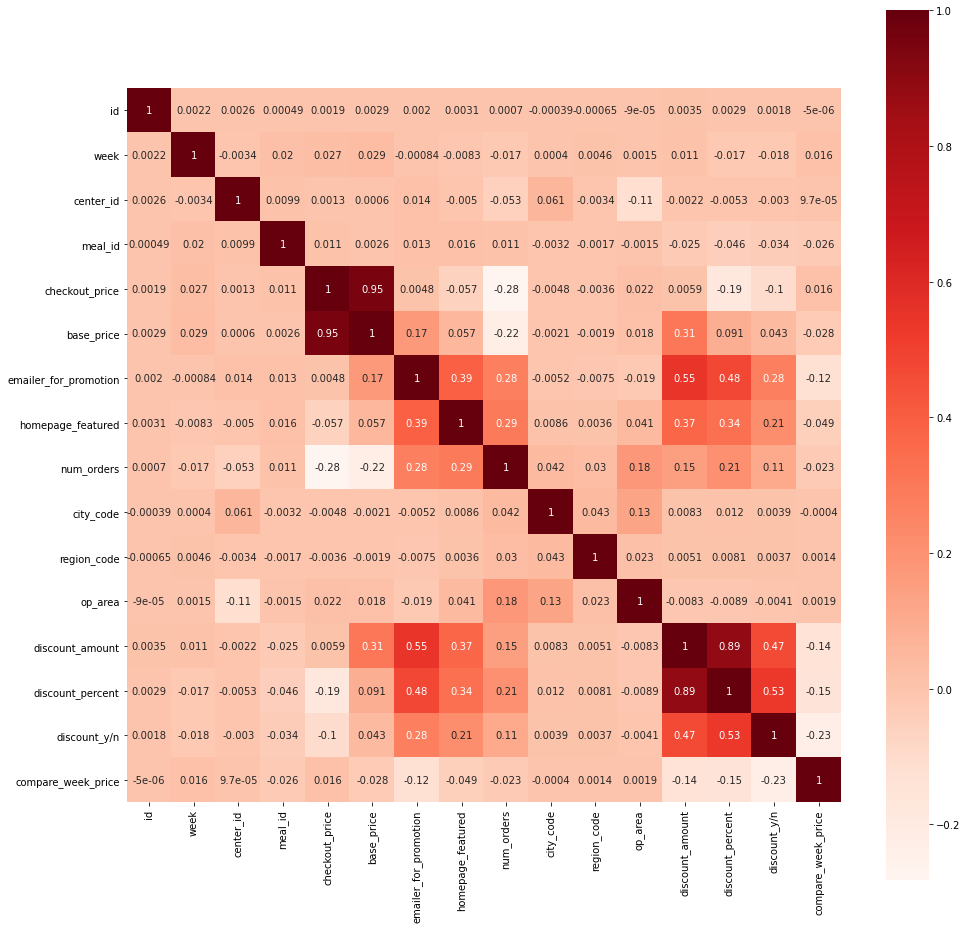

In [44]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True, square=True, cmap='Reds')

In [45]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n,compare_week_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,1
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian,83.39,25.972529,1,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian,69.84,22.288887,1,0


In [46]:
len(pd.unique(data['center_type']))

3

In [47]:
#lets analyse the numbers of orders on basis of types of centeres

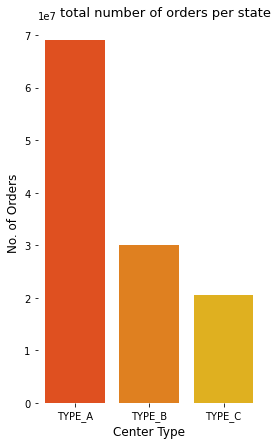

In [48]:
fig=plt.figure(figsize=(4,7))
plt.title('        total number of orders per state',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type',data=train.groupby('center_type').sum()['num_orders'].reset_index(), palette='autumn');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [49]:
train['center_id'].nunique()

77

In [50]:
#so we have total 77 fulfillment centeres

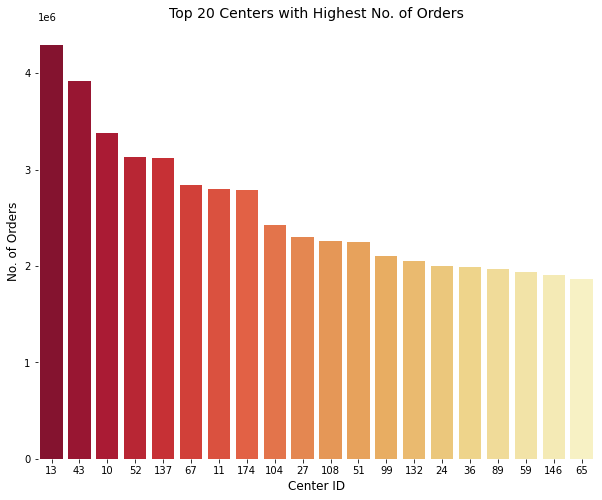

In [51]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

We saw that center type A has the maximum numbers of orders but on checking total numbers of orders on each center we found that center no 13 of b has the maximum number of orders . 
lets analyse why?

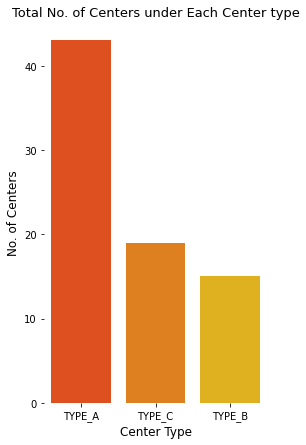

In [52]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette='autumn');
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Type_A has the most number of orders because, Type_A has the most number of Centers - 43 Centers. and type b has less no of centers so the maximum order placed is in center 13 of type b

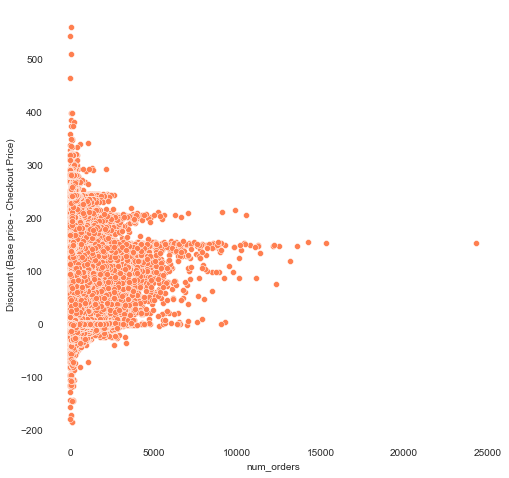

In [53]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train['base_price']-train['checkout_price'],x=train['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

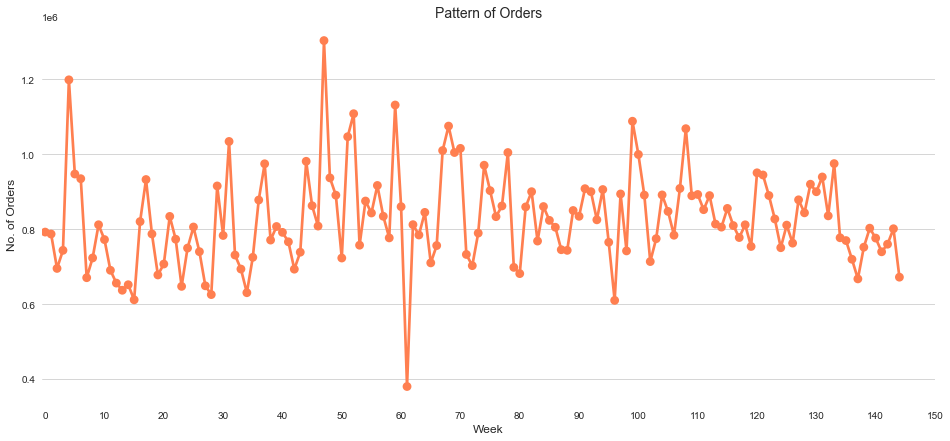

In [54]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 160, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Based on the analysis of  the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

In [55]:
print(train[train['week']==45].groupby('week').num_orders.sum())
print(train[train['week']==46].groupby('week').num_orders.sum())
print(train[train['week']==47].groupby('week').num_orders.sum())
print(train[train['week']==48].groupby('week').num_orders.sum())
print(train[train['week']==49].groupby('week').num_orders.sum())

week
45    981199
Name: num_orders, dtype: int64
week
46    862620
Name: num_orders, dtype: int64
week
47    808269
Name: num_orders, dtype: int64
week
48    1303457
Name: num_orders, dtype: int64
week
49    936980
Name: num_orders, dtype: int64


In [56]:
print(train[train['week']==61].groupby('week').num_orders.sum())
print(train[train['week']==62].groupby('week').num_orders.sum())
print(train[train['week']==63].groupby('week').num_orders.sum())

week
61    860105
Name: num_orders, dtype: int64
week
62    380065
Name: num_orders, dtype: int64
week
63    812075
Name: num_orders, dtype: int64


In [57]:
train[train['week']==48].groupby('region_code').num_orders.sum().sort_values(ascending = False)

region_code
56    599744
34    289511
77    260384
85     87065
93     19975
71     19560
23     18607
35      8611
Name: num_orders, dtype: int64

In [58]:
train[train['week']==62].groupby('region_code').num_orders.sum().sort_values(ascending = False)

region_code
56    165490
34     93367
77     80597
85     23032
93      5869
71      5684
23      3413
35      2613
Name: num_orders, dtype: int64

In [59]:
train[train['week']==48].groupby('city_code').num_orders.sum().sort_values(ascending = False)

city_code
590    192672
526    118369
638     67603
699     39895
604     38536
522     36881
647     36873
517     31612
593     29534
576     28898
614     28098
700     27684
628     26107
685     24204
676     24196
579     23205
679     21749
680     21195
577     20368
609     19975
485     19929
596     19560
602     19529
713     19072
659     18917
648     18781
698     18607
651     18453
599     17876
456     17681
703     17559
695     17115
620     16938
556     14923
515     13952
675     13774
649     13602
473     13503
683     13345
562     12346
632     11943
654     11896
461     11559
561     11336
615     11321
553     11093
658      9246
702      8611
541      8399
693      8293
478      6644
Name: num_orders, dtype: int64

In [60]:
train[train['week']==62].groupby('city_code').num_orders.sum().sort_values(ascending = False)

city_code
590    53733
526    35156
638    18094
522     9180
517     8907
614     8816
576     8758
604     8599
647     8574
685     8531
700     8446
699     7480
676     7389
679     7291
485     7273
651     7226
593     6781
602     6738
713     6736
579     6662
628     6603
675     6364
659     6199
648     6132
620     5917
609     5869
577     5707
596     5684
680     5446
473     5271
456     5117
703     5088
461     4965
556     4901
683     4421
615     4358
632     4182
599     4131
561     4049
553     3872
695     3869
562     3791
515     3759
698     3413
541     3236
649     3175
693     3164
654     3009
658     2986
702     2613
478     2404
Name: num_orders, dtype: int64

In [61]:
train[train['week']==62].groupby('center_id').num_orders.sum().sort_values(ascending = False)

center_id
13     14627
43      9563
10      8875
67      8859
137     8534
       ...  
74      2613
149     2404
55      1824
41      1014
91       987
Name: num_orders, Length: 77, dtype: int64

In [62]:
train[train['week']==48].groupby('center_id').num_orders.sum().sort_values(ascending = False)

center_id
43     42733
13     36006
137    31506
104    28423
174    27684
       ...  
57      8399
139     8293
149     6644
41      5719
91      4759
Name: num_orders, Length: 77, dtype: int64

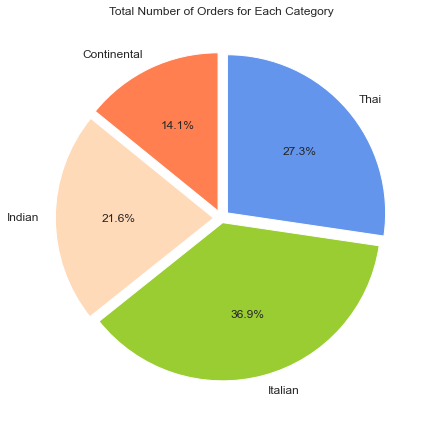

In [63]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

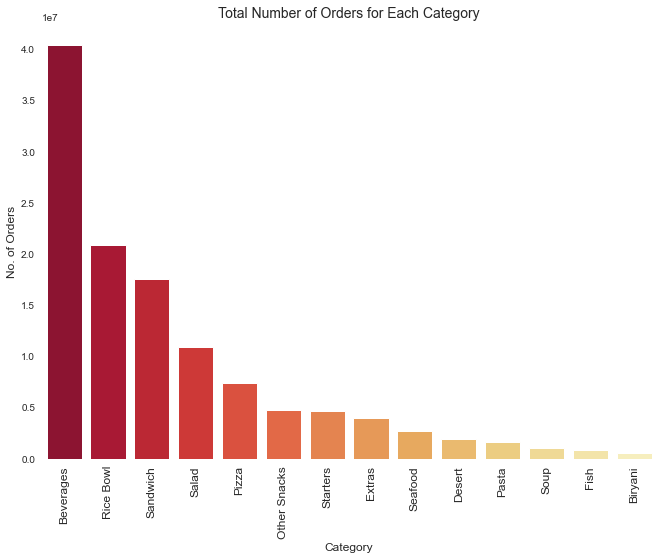

In [64]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

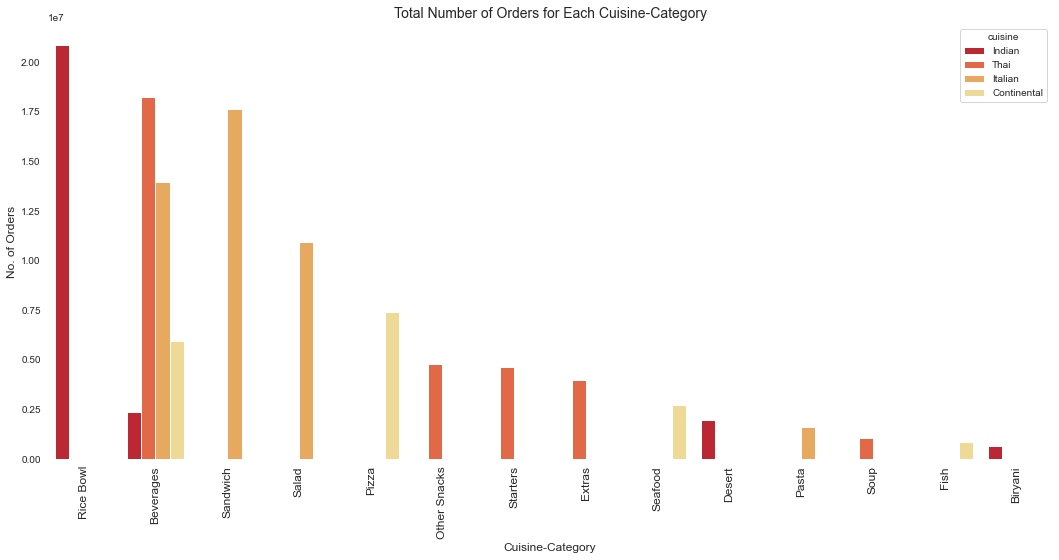

In [65]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

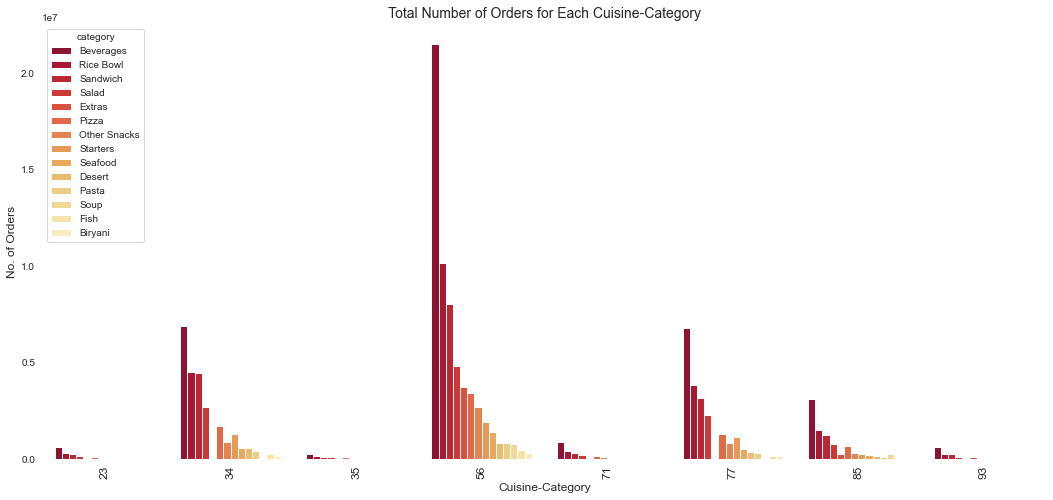

In [66]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='region_code',y='num_orders',data=train.groupby(['region_code','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='category',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

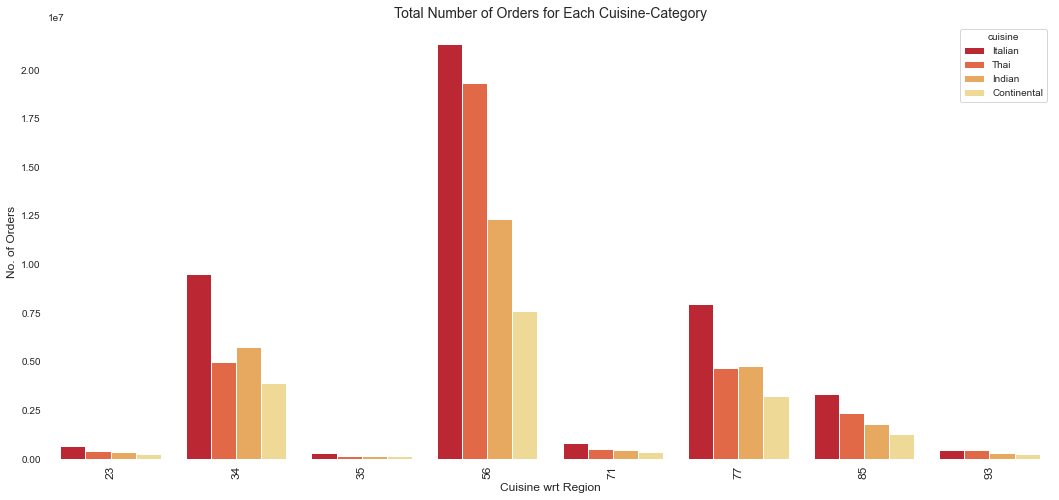

In [67]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='region_code',y='num_orders',data=train.groupby(['region_code','cuisine']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine wrt Region',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

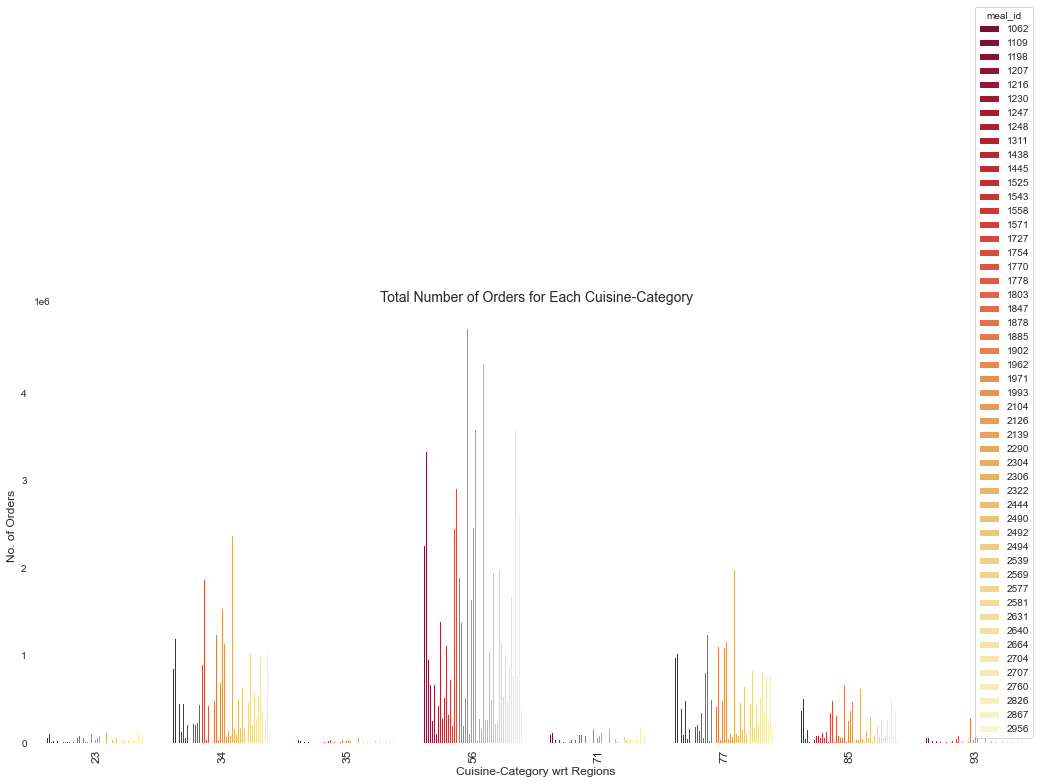

In [68]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='region_code',y='num_orders',data=train.groupby(['region_code','meal_id']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='meal_id',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category wrt Regions',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [69]:
list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0])

[56, 34, 77, 85, 71, 23, 93, 35]

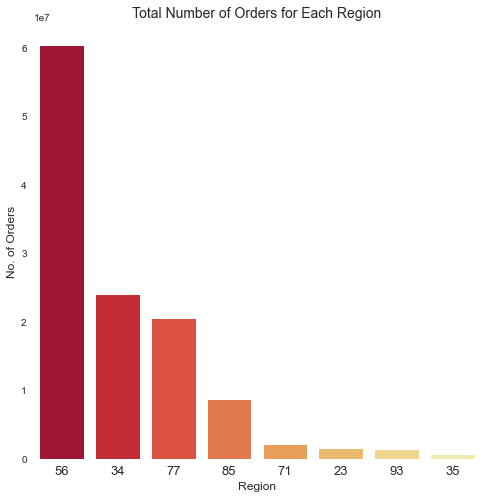

In [70]:
fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Number of Orders for Each Region',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='region_code', data=data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0]));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.xticks()
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to Region, we could see that Region - 56 has the highest number of orders - 60.5M orders which is almost 35M orders higher than the Region with second highest number of orders - Region 34 - 24M orders.

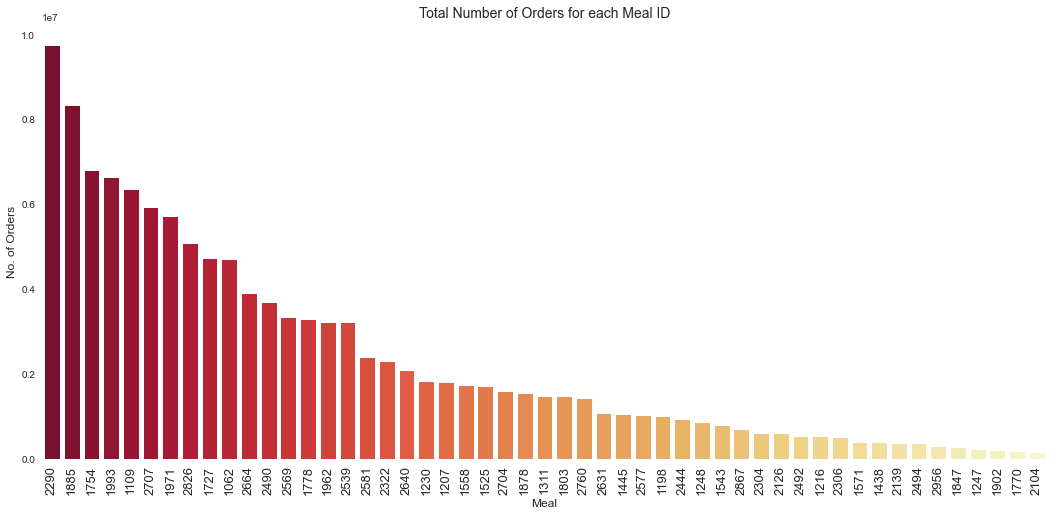

In [71]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each Meal ID',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='meal_id', data=data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index()['meal_id'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Meal',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


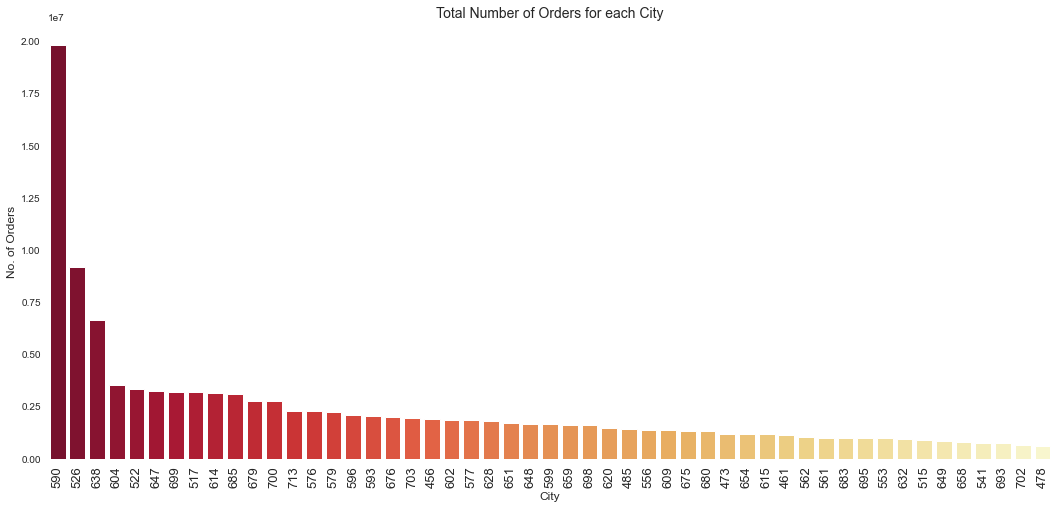

In [72]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each City',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='city_code', data=train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()['city_code'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('City',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

As per our observation from our barchart of the City against the number of orders. There the high significant difference between the Top 3 cities which has the highest number of orders. Therefore, in our first approach we will encode the City with Highest No. of Orders as CH1, City with 2nd Highest No. of Orders as CH2 and City with 3rd Highest No. of Orders as CH3 and rest all of the cities which does not have much significant differences between the number of orders as CH4.

In [73]:
city4={590:'CH1', 526:'CH2', 638:'CH3'}
data['city_enc_4']=data['city_code'].map(city4)
data['city_enc_4']=data['city_enc_4'].fillna('CH4')

In [74]:
data['city_enc_4'].value_counts()

CH4    338230
CH1     54746
CH2     43525
CH3     20047
Name: city_enc_4, dtype: int64

In [75]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n,compare_week_price,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0,CH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,1,CH4
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,0.00,0.000000,0,0,CH4
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian,83.39,25.972529,1,0,CH4
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian,69.84,22.288887,1,0,CH4


In [76]:
#copying to newDataFrame
datax = data.copy()
datax.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n,compare_week_price,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0,CH4


Encoding alll categorical values

In [77]:
datax['center_id']=datax['center_id'].astype('object')
datax['meal_id']=datax['meal_id'].astype('object')
datax['region_code']=datax['region_code'].astype('object')

In [78]:
obj=datax[['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4']]
num=datax.drop(['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4'],axis=1)

In [79]:
encode1=pd.get_dummies(obj,drop_first = True)

In [80]:
datax=pd.concat([num,encode1],axis=1)

In [81]:
datax.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount_amount,discount_percent,discount_y/n,compare_week_price,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,1379560,1,136.83,152.29,0,0,177,647,2.0,15.46,10.151684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1466964,1,136.83,135.83,0,0,270,647,2.0,-1.00,-0.736214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1346989,1,134.86,135.86,0,0,189,647,2.0,1.00,0.736052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1338232,1,339.50,437.53,0,0,54,647,2.0,98.03,22.405321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,647,2.0,-1.00,-0.412371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [82]:
abs(train.corr()['num_orders']).sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.282108
emailer_for_promotion    0.277147
base_price               0.222306
discount_percent         0.205188
op_area                  0.176976
discount_amount          0.152950
discount_y/n             0.111766
center_id                0.053035
city_code                0.041596
region_code              0.029744
compare_week_price       0.023004
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

# base model 

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
train=datax[datax['week'].isin(range(1,136))]
test=datax[datax['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=test['num_orders']

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.49279307739704203
Test Score : 0.5058139695254523
R squared : 0.5058139695254523
RMSE : 194.4408340932996


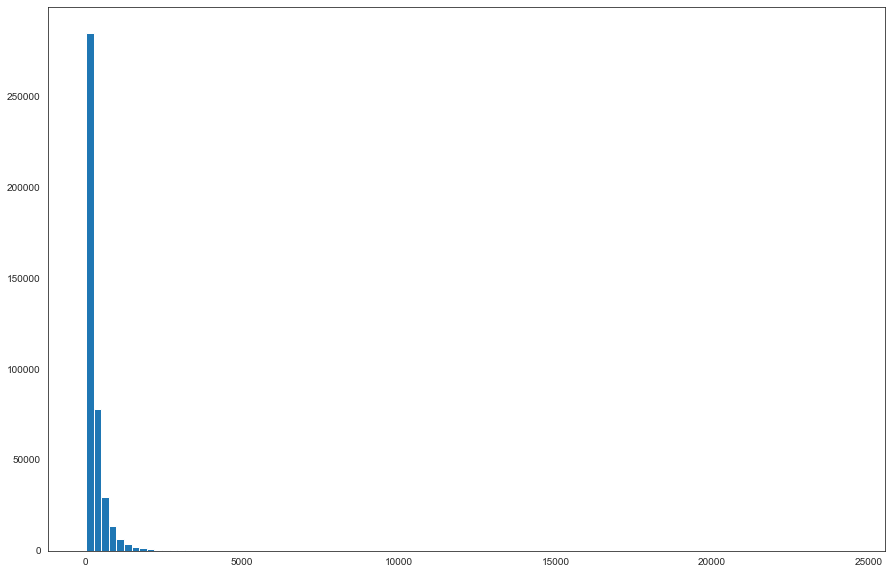

In [85]:

plt.figure(figsize = (15,10))
plt.hist(train.num_orders, bins = 100)
plt.show()

we can see that the graph is positively skewed so we should use log transformation

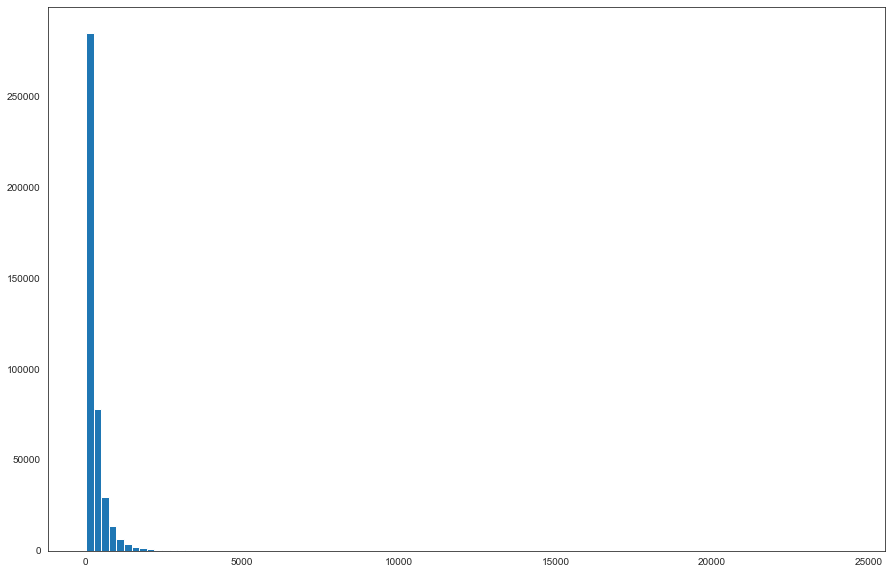

In [86]:
plt.figure(figsize = (15,10))
plt.hist(y_train, bins = 100)
plt.show()

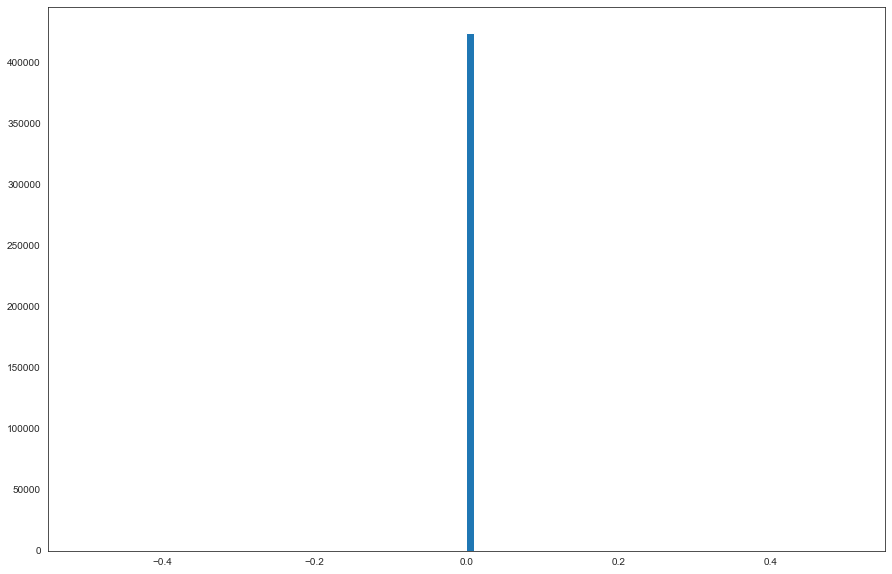

In [87]:
plt.figure(figsize = (15,10))
plt.hist(np.reciprocal(train.num_orders), bins = 100)
plt.show()

In [88]:
sc=StandardScaler()

cat=datax.drop(['checkout_price','base_price','discount_amount','discount_percent','compare_week_price'],axis=1)
num=datax[['checkout_price','base_price','discount_amount','discount_percent','compare_week_price']]
scal= pd.DataFrame(sc.fit_transform(num),columns=num.columns)
datas=pd.concat([scal,cat],axis=1)

train=datas[datas['week'].isin(range(1,136))]
test=datas[datas['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=np.log1p(train['num_orders']) #Applying Log Transformation on the Target Feature

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=np.log1p(test['num_orders']) #Applying Log Transformation on the Target Feature

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7287799045210647
Test Score : 0.704627498214157
R squared : 0.704627498214157
RMSLE : 0.6245337155410742


In [89]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

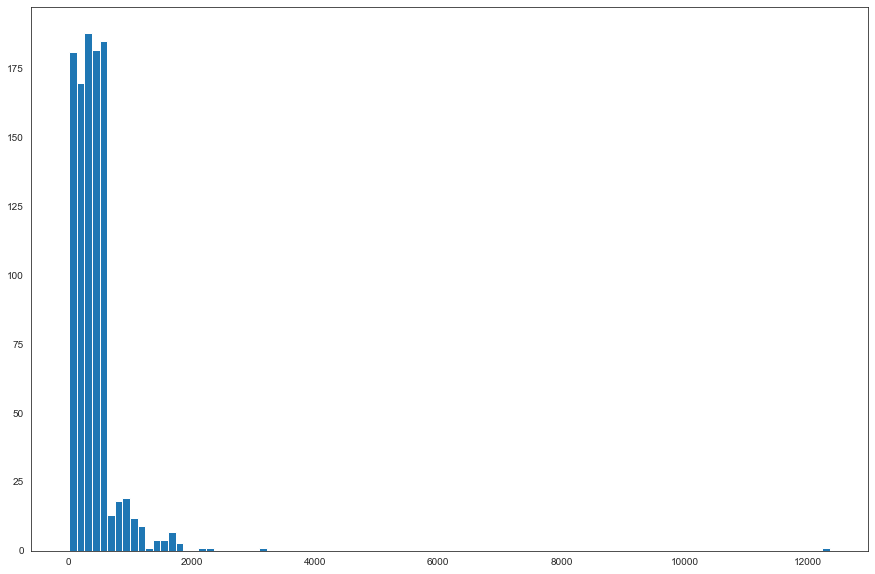

In [90]:
plt.figure(figsize = (15,10))
plt.hist(inverse_transform_sampling(train.num_orders), bins = 100)
plt.show()

copying to new dataframe

In [91]:
datay=datas.copy()

In [92]:
datay['Quarter']=(datas['week']/13).astype('int64')

In [93]:
datay['Quarter'] = datay['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [94]:
datay['Quarter'].value_counts()

Q3    124225
Q2    122386
Q1    117671
Q4     92266
Name: Quarter, dtype: int64

In [95]:
datay['Year']=(datas['week']/52).astype('int64')

In [96]:
datay['Year'] = datay['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [97]:
objy=datay[['Quarter', 'Year']]
numy=datay.drop(['Quarter', 'Year'],axis=1)

encode1y=pd.get_dummies(objy,drop_first = True)
encode1y.head()

datay=pd.concat([numy,encode1y],axis=1)

In [98]:
datay.head(10)

,checkout_price,base_price,discount_amount,discount_percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount_y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.277687,-1.256048,-0.133160,0.390063,-0.854054,1379560,1,0,0,177,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-1.277687,-1.358465,-0.472571,-0.568148,-0.854054,1466964,1,0,0,270,647,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-1.290568,-1.358278,-0.431330,-0.438578,-0.854054,1346989,1,0,0,189,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.047477,0.518763,1.569462,1.468468,-0.854054,1338232,1,0,0,54,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,-0.580222,-0.694746,-0.472571,-0.539647,-0.854054,1448490,1,0,0,40,647,2.0,0,0,0,0

Detecting outliers and applying Log Transformation on the Target Feature

In [99]:
train=datay[datay['week'].isin(range(1,146))]
def outliers_3(col):
    q3=round(train[col].quantile(0.75),6)
    q1=round(train[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=train[train[col]>hw].shape[0]
    lo=train[train[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)

In [100]:
outliers_3('num_orders')

Number of Upper Outliers : 13245
Number of Lower Outliers : 0
Percentage of Outliers : 2.901118830878681


In [101]:
datay['num_orders']=np.log1p(datay['num_orders'])

In [102]:
train=datay[datay['week'].isin(range(1,146))]
def outliers_3(col):
    q3=round(train[col].quantile(0.75),6)
    q1=round(train[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=train[train[col]>hw].shape[0]
    lo=train[train[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)

In [103]:
outliers_3('num_orders')

Number of Upper Outliers : 0
Number of Lower Outliers : 0
Percentage of Outliers : 0.0


In [104]:
datay.head()

,checkout_price,base_price,discount_amount,discount_percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount_y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.277687,-1.256048,-0.133160,0.390063,-0.854054,1379560,1,0,0,5.181784,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-1.277687,-1.358465,-0.472571,-0.568148,-0.854054,1466964,1,0,0,5.602119,647,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-1.290568,-1.358278,-0.431330,-0.438578,-0.854054,1346989,1,0,0,5.247024,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.047477,0.518763,1.569462,1.468468,-0.854054,1338232,1,0,0,4.007333,647,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,-0.580222,-0.694746,-0.472571,-0.539647,-0.854054,1448490,1,0

In [105]:
abs(datay.corr()['num_orders']).sort_values(ascending=False)

num_orders            1.000000
checkout_price        0.389443
base_price            0.329608
category_Biryani      0.292612
category_Rice Bowl    0.279013
                        ...   
meal_id_2640          0.002436
Year_Y2               0.002207
compare_week_price    0.001571
id                    0.001355
center_id_106         0.000151
Name: num_orders, Length: 172, dtype: float64

In [106]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount_amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount_amount','city_code'],axis=1)
y_test=test['num_orders'] 

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7289919613363636
Test Score : 0.7042702389230149
R squared : 0.7042702389230149
RMSLE : 0.6249112947752573


Linear Model doesn't seems to be yielding much better result. Therefore, we are proceeding with advanced models & ensemble techniques.

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

from lightgbm import LGBMRegressor

In [108]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount_amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders', 'week','discount_amount','city_code'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

[19:02:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train Score : 0.8725860924586105
Test Score : 0.8063739694144291
Explained Variance : 0.769202676396719
RMSLE : 0.505653164175608


In [109]:
abs(train.corr())[abs(train.corr())>0.5]

,checkout_price,base_price,discount_amount,discount_percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount_y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
checkout_price,1.00000,0.95267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_price,0.95267,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,NaN,NaN,1.000000,0.886365,NaN,NaN,NaN,0.55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<AxesSubplot:>

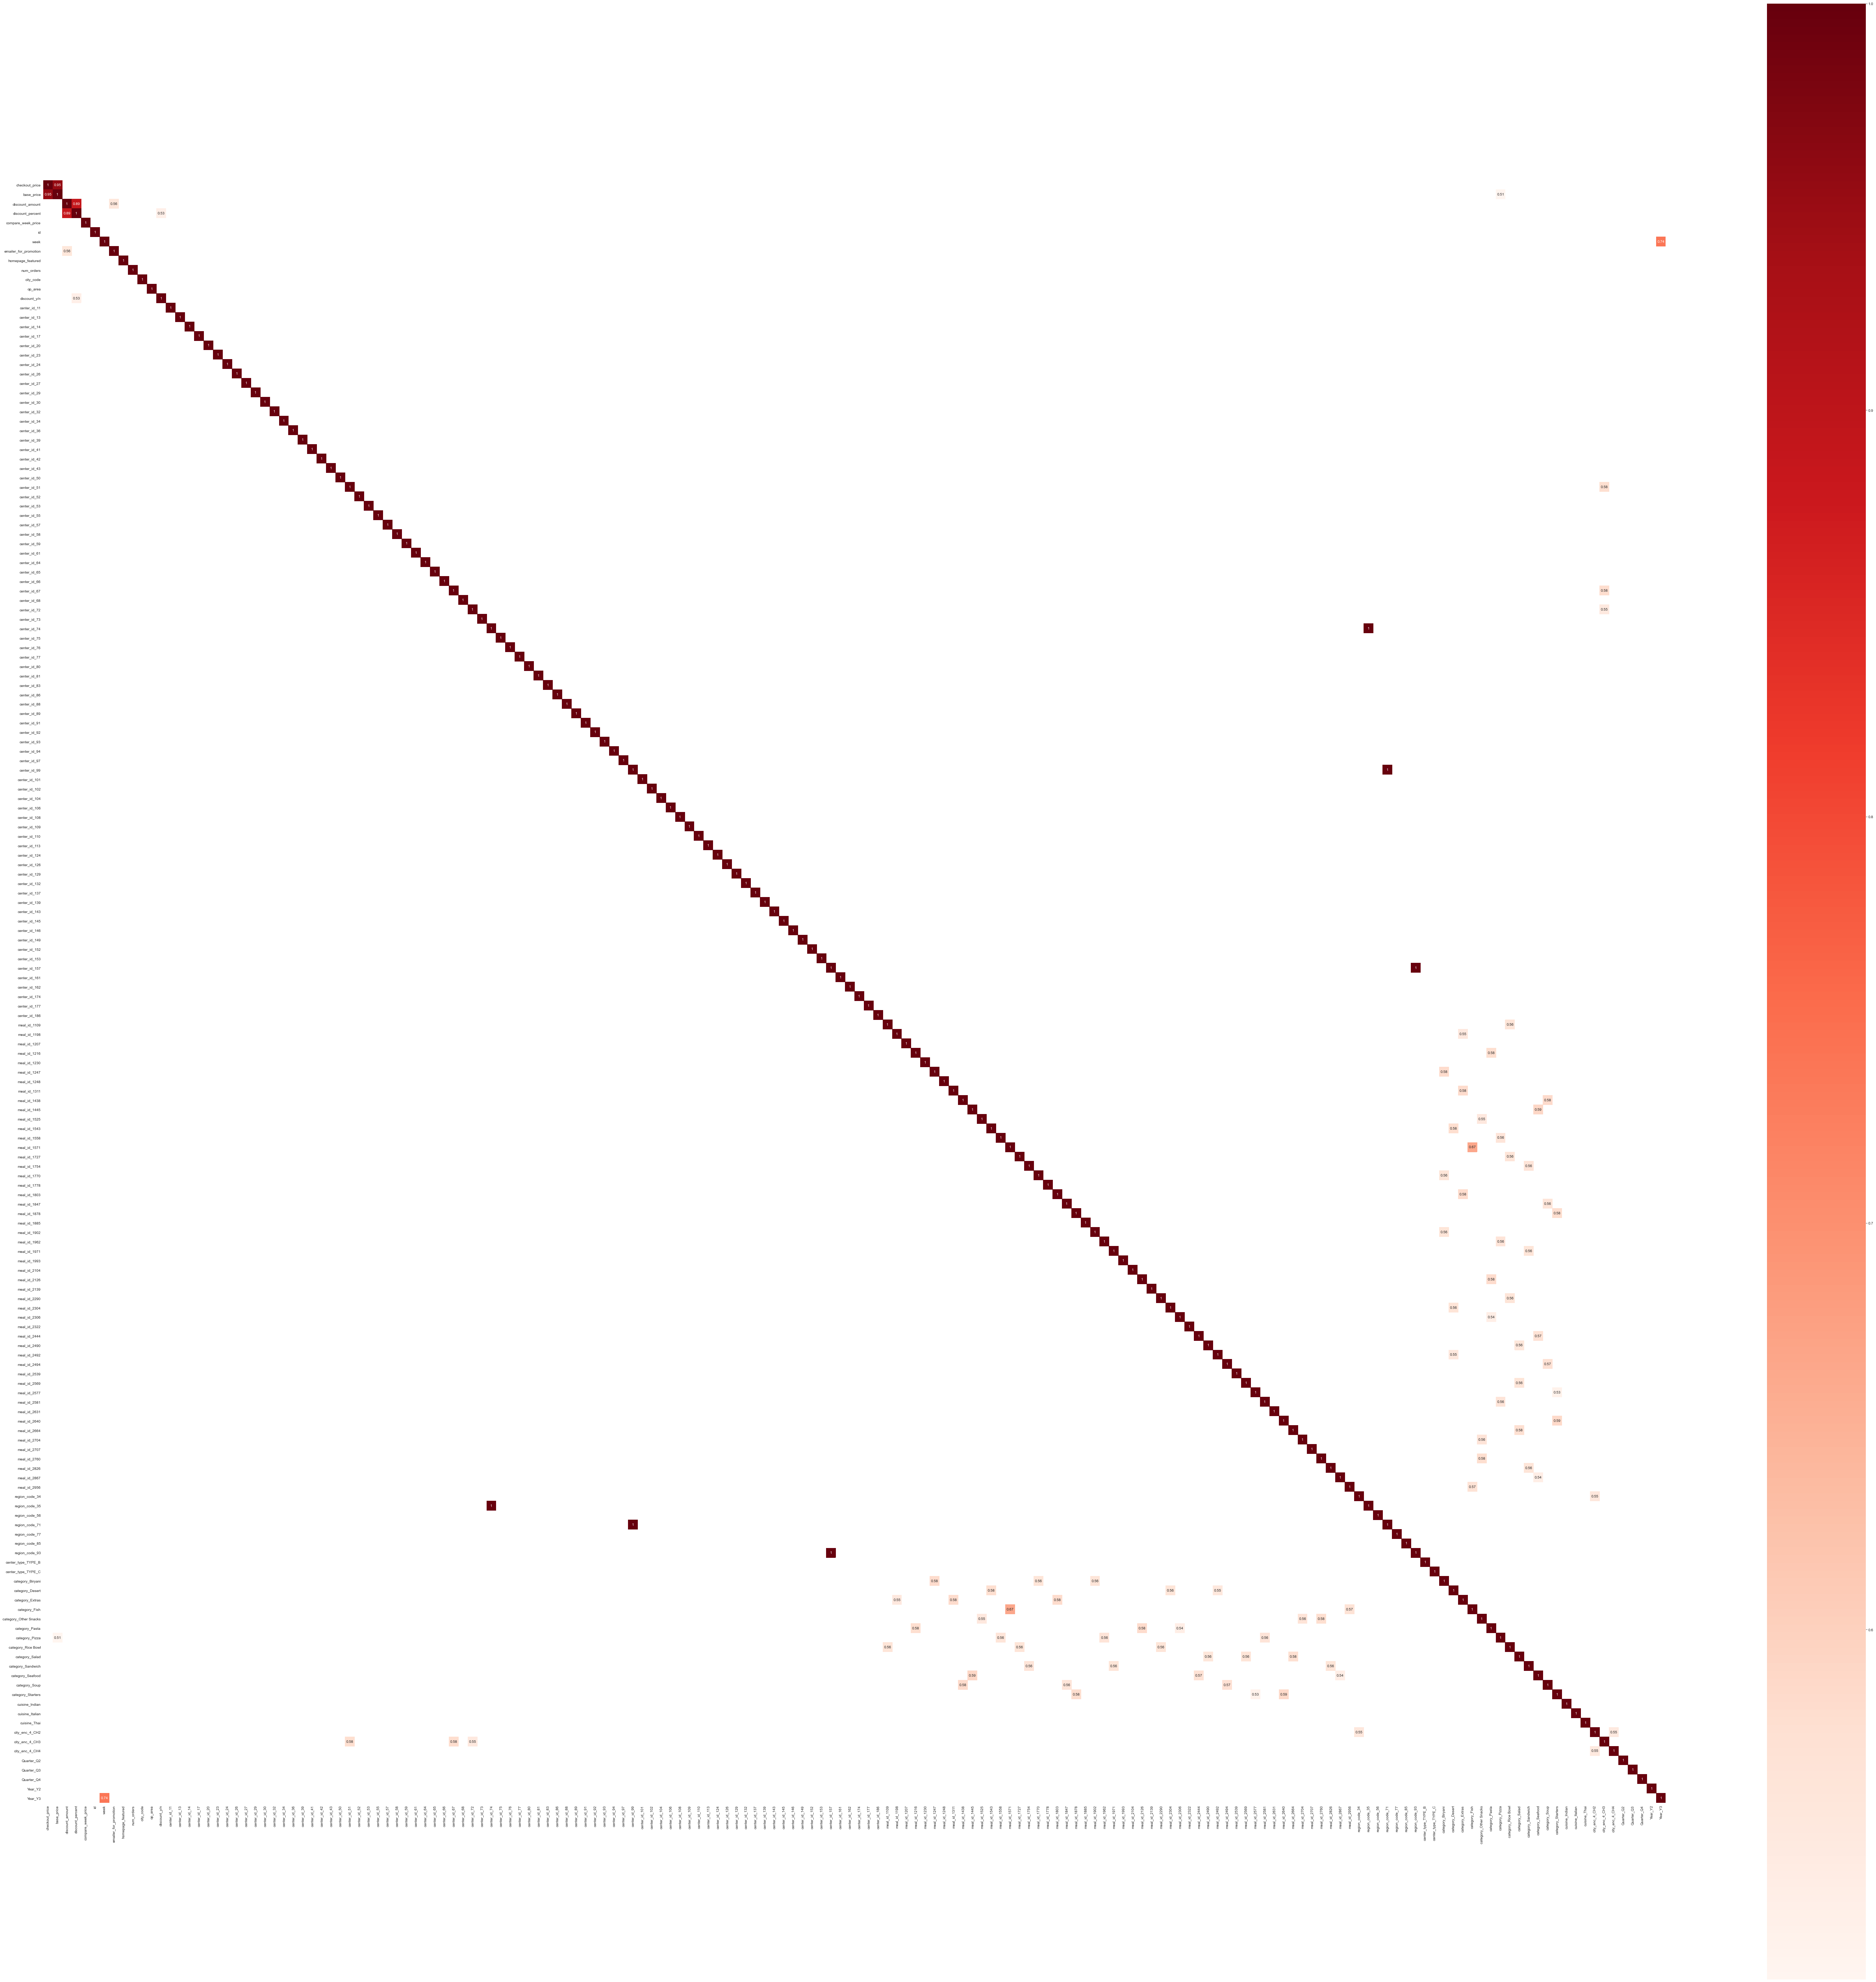

In [110]:
plt.figure(figsize=(100,100))
sns.heatmap(abs(train.corr())[abs(train.corr())>0.5],annot=True, square=True, cmap='Reds')

In [111]:
#Removing columns with high collinearity'
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount_amount','city_code','Quarter_Q2','base_price','discount_percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount_amount','city_code','Quarter_Q2','base_price','discount_percent'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))


[19:07:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train Score : 0.8689164822703782
Test Score : 0.8064427798473953
Explained Variance : 0.7708667685156951
RMSLE : 0.5055633071845919
